In [1]:
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
import sklearn.linear_model as ln
from PIL import Image
import colorsys
import math
import os

In [2]:
n = 500
width = 1000 #pixels
aspectRatio = 4/3
height = round(width / aspectRatio)

img = Image.new('RGB', (width, height), color = 'black')
pixels = img.load()

def powerColor(distance, exp, const, scale):
    color = distance**exp
    rgb = colorsys.hsv_to_rgb(const + scale * color,1 - 0.6 * color,0.9)
    return tuple(round(i * 255) for i in rgb)

def logColor(distance, base, const, scale):
    color = -1 * math.log(distance, base)
    rgb = colorsys.hsv_to_rgb(const + scale * color,0.8,0.9)
    return tuple(round(i * 255) for i in rgb)

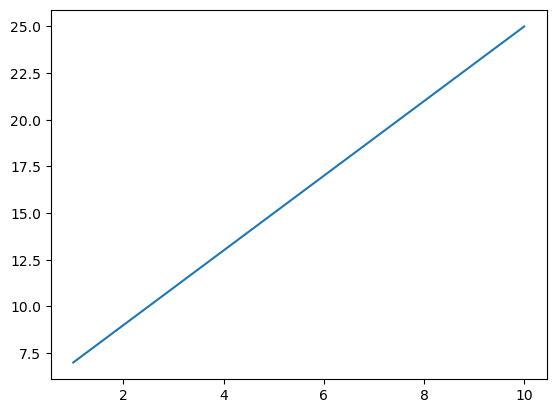

In [3]:
x = np.linspace(1,10,30)
y = 2*x+5
plt.plot(x,y)

Slope=  [1.85824552]
Intercept=  [5.20766707]


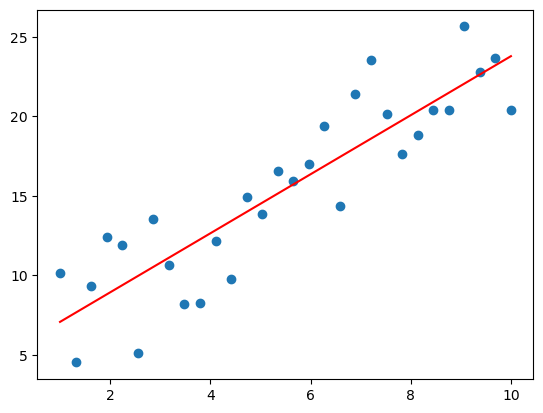

In [4]:
e = np.random.normal(0,3,30)
y = y+e
plt.scatter(x,y)
model = ln.LinearRegression()
x = x.reshape(-1,1)
model.fit(x,y)
yp = model.predict(x)
slope = (yp[29]-yp[28])/(x[29]-x[28])
intercept = yp[29]-slope*x[29]
print("Slope= ",slope)
print("Intercept= ",intercept)
plt.plot(x,yp,'r')

In [5]:
#Calculating the Error Function for different values of 'm' and 'c'.
m = np.linspace(-10,10,60)
c = np.linspace(-10,10,60)
Er = np.zeros((60,60))
t=0
for i in range(len(m)):
    for j in range(len(c)):
        for k in range(30):
            t = y[k]**2+m[i]**2*x[k]**2+c[j]**2-2*m[i]*x[k]*y[k]-2*c[j]*y[k]
            Er[i,j] = Er[i,j]+t
        Er[i,j] = Er[i,j]/30
        #print(Er[i,j])

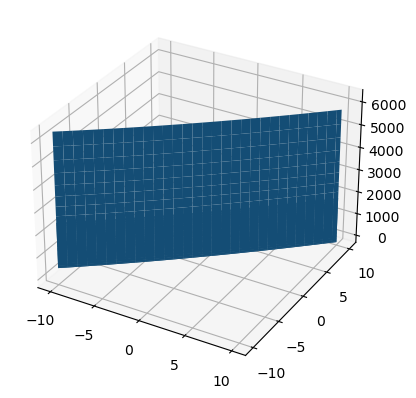

In [6]:
#Plotting the Error Function
ax = plt.axes(projection='3d')
ax.xlabel=('Slope')
ax.ylabel=('Intercept')
ax.zlabel=('Error Function')
ax.plot_surface(c,m,Er,shade=True)

Repelling Cycle  gm =  [9.27423251]  gc =  [0.53210883]
Slope=  0    Intercept=  10.129192066377968    Error=  [59.76124998]    Count =  1


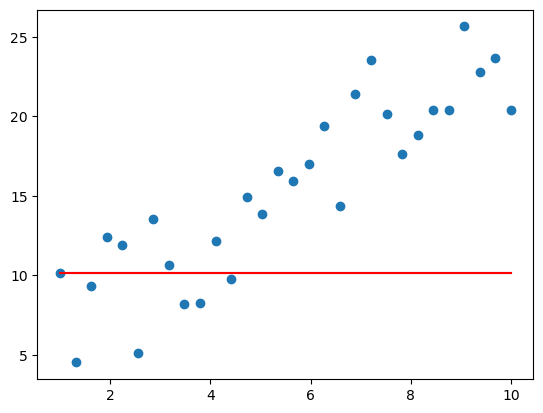

In [8]:
#Trying to optimize the error function using Newton's Method
t,dm,m,dc,e = 0,1,0,1,500
c = y[0]
count = 0
while((dm**2 > 0.01) and (dc**2 > 0.01)):
#while(e>10):
#while((dm>0) or (dc>0) or (e>20)):
    count = count+1
    dm,dc = 0,0
    yp = m*x+c
    plt.plot(x,yp)
    t=0
    for i in range(30):
        t = (2/30)*(m*x[i]**2+x[i]*c-x[i]*y[i])
        dm = dm + t
    t=0
    for i in range(30):
        t = (2/30)*(m*x[i]+c-y[i])
        dc = dc + t
    if( (dm==0) or (dc==0)):
            print("Inf Error")
            break
    e,t,X = 0,0,0
    for k in range(30):
        t = (yp[k]-y[k])**2
        e = e + t
        t = x[k]**2
        X = X + t
    e = e/30
    gm = (e*X)/dm**2
    gc = e/dc**2
    if (abs(gm)>1) or (abs(gm)>1):
        print("Repelling Cycle  gm = ",gm," gc = ",gc)
        break
    m = m - (e/dm)
    c = c - (e/dc)
    print("Slope= ",m,"   Intercept= ",c,"   Error= ",e,"   Count = ",count," dm= ",dm," dc= ",dc)
plt.scatter(x,y)
plt.plot(x,yp,'r')
print("Slope= ",m,"   Intercept= ",c,"   Error= ",e,"   Count = ",count)

In [11]:
#Plotting Julia-Fatou for the Newton's Method Step Function
X = np.linspace(-3,3,width)
Y = np.linspace(-3,3,height)
distance,c = 0,5
for l in range(height):
    for m in range(width):
        z = complex(X[m],Y[l])
        for i in range(n):
            t,dz = 0,0
            for j in range(30):
                t = (2/30)*(z*x[j]**2+x[j]*c-x[j]*y[j])
                dz = dz + t
            t,e = 0,0
            for j in range(30):
                t = y[j]**2+z**2*x[j]**2+c**2-2*z*x[j]*y[j]-2*c*y[j]
                e = e + t
            z = z-(e/dz)
            if(np.real(z*z.conjugate())) > 2:
                break
        if i < n:
            distance = (i + 1) / (n + 1)
            rgb = logColor(distance, 0.2, 0.27, 1.0)
        else:
            rgb = colorsys.hsv_to_rgb(0,0,0)
        pixels[m,l] = rgb

In [12]:
img.save('Netwons_Method_for_LR.png')
os.system('open Netwons_Method_for_LR.png')

1